In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
hotels = pd.read_excel("./data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")

In [5]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [6]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'date'],
      dtype='object')

# Assignment 1: Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and axis labels, remove scientific notation, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [10]:
daily_revenue = (
    hotels
        .groupby('date')
        .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
)

monthly_revenue = daily_revenue.resample('M').sum()
monthly_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35
2016-06-30,588701.29,151214.74
2016-07-31,749828.61,210745.90
2016-08-31,842445.29,238536.04
2016-09-30,774270.05,181678.34


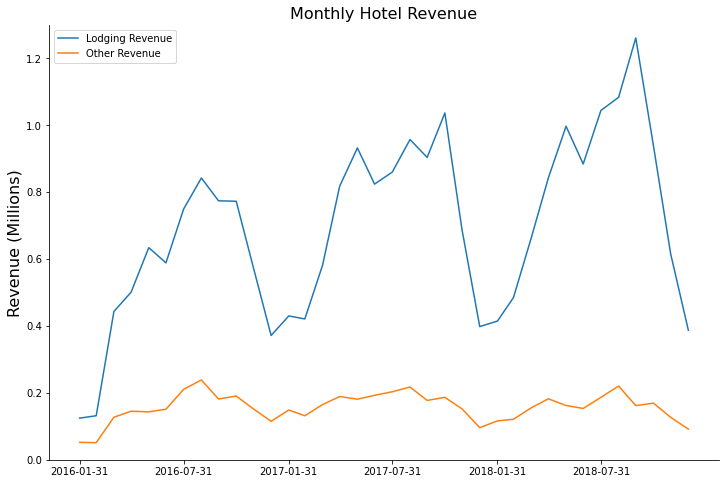

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(monthly_revenue.index, monthly_revenue.LodgingRevenue/1000000)
ax.plot(monthly_revenue.index, monthly_revenue.OtherRevenue/1000000)
ax.legend(['Lodging Revenue', 'Other Revenue'], loc='upper left')
ax.set_ylabel('Revenue (Millions)', fontsize=16)
ax.set_ylim(0, 1.3)
ax.set_xticks(monthly_revenue.index[::6])
ax.set_title('Monthly Hotel Revenue', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

In [35]:
quarterly_bookings = (
    hotels
        .groupby('date')
        .agg({'RoomNights': 'sum', 'BookingsCanceled': 'sum'})
).resample('Q').sum()


In [36]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


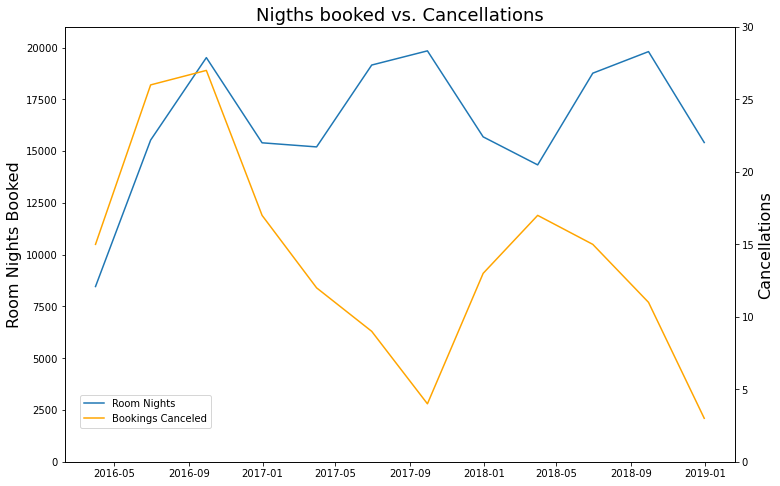

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(quarterly_bookings.index,
        quarterly_bookings['RoomNights'],
        label='Room Nights'
       )
ax.set_ylabel('Room Nights Booked', fontsize=16)
ax.set_ylim(0, 21000)

ax2 = ax.twinx()
ax2.plot(quarterly_bookings.index,
        quarterly_bookings['BookingsCanceled'],
        label='Bookings Canceled',
        color='orange')
ax2.set_ylabel('Cancellations', fontsize=16)
ax2.set_ylim(0, 30)

# fig.suptitle('Nigths booked vs. Cancellations')
ax.set_title('Nigths booked vs. Cancellations', fontsize=18)
fig.legend(bbox_to_anchor=(0.3,0.25))
plt.show()

# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [58]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [72]:
countries = (
    hotels.groupby('Nationality')
     .agg({'RoomNights': 'sum', 'LodgingRevenue': sum})
     .sort_values('RoomNights', ascending=False)
     .iloc[:10]
)

countries

,RoomNights,LodgingRevenue
Nationality,,
FRA,31018,3809315.59
DEU,26334,3113382.55
PRT,24334,2715008.72
GBR,20822,2693123.61
ESP,10877,1475909.33
ITA,8046,1032729.72
BEL,7758,1047661.98
NLD,6619,904460.78
BRA,6535,787928.01


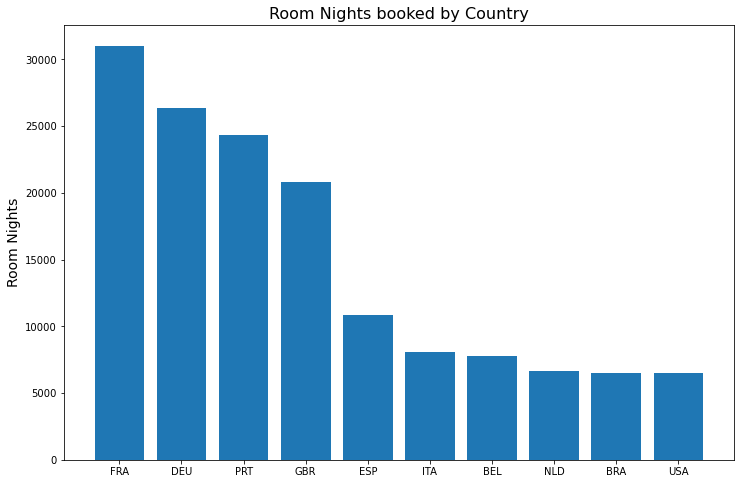

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(
    countries.index,
    countries['RoomNights']
)
ax.set_title('Room Nights booked by Country', fontsize=16)
ax.set_ylabel('Room Nights', fontsize=14)
plt.show()

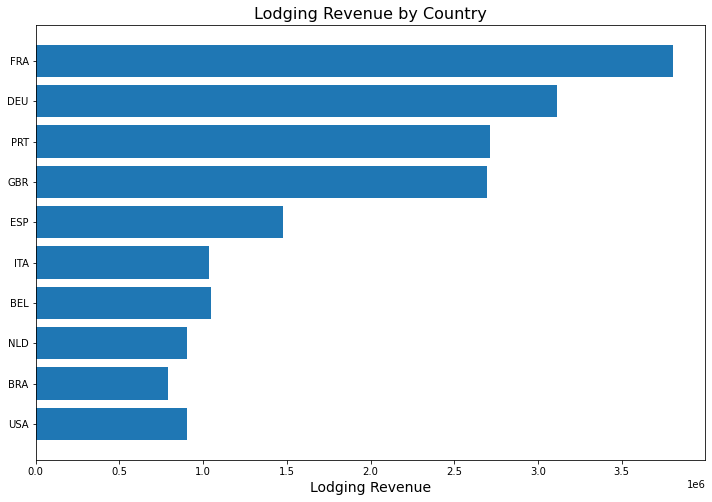

In [70]:
fig, ax = plt.subplots(figsize=(12,8))

ax.barh(countries.index[::-1], countries['LodgingRevenue'].iloc[::-1])
ax.set_title('Lodging Revenue by Country', fontsize=16)
ax.set_xlabel('Lodging Revenue', fontsize=14)
plt.show()

# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [81]:
country_filter = ["FRA", "DEU", "PRT", "GBR", "ESP"]

country_subset = (
    hotels.loc[hotels['Nationality'].isin(country_filter)]
     .groupby('Nationality')
     .agg({'OtherRevenue': 'sum', 'LodgingRevenue': sum})
     .sort_values('LodgingRevenue', ascending=False)
)

country_subset.head()

,OtherRevenue,LodgingRevenue
Nationality,,
FRA,1033166.30,3809315.59
DEU,725541.53,3113382.55
PRT,665634.58,2715008.72
GBR,591212.77,2693123.61
ESP,319840.82,1475909.33


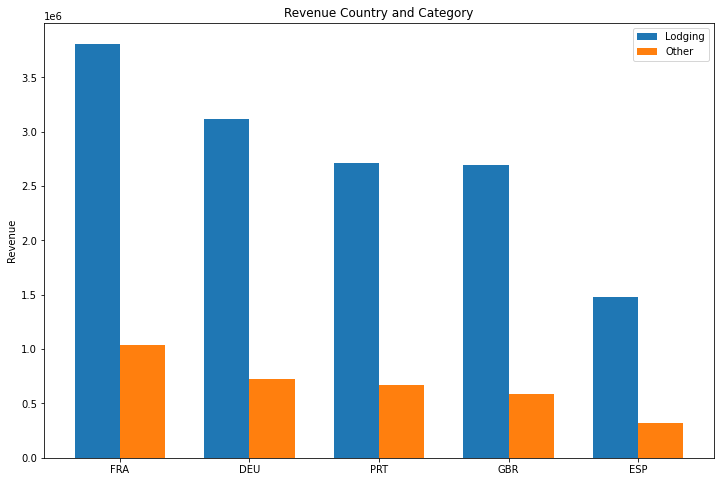

In [88]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))

width = 0.35
x = np.arange(len(country_subset))

ax.bar(
    x-0.5*width,
    country_subset['LodgingRevenue'],
    label='Lodging',
    width=width
)

ax.bar(
    x+0.5*width,
    country_subset['OtherRevenue'],
    label='Other',
    width=width
)

ax.set_ylabel('Revenue')
ax.set_xticks(x)
ax.set_xticklabels(country_subset.index)
ax.legend()

ax.set_title('Revenue Country and Category')

plt.show()

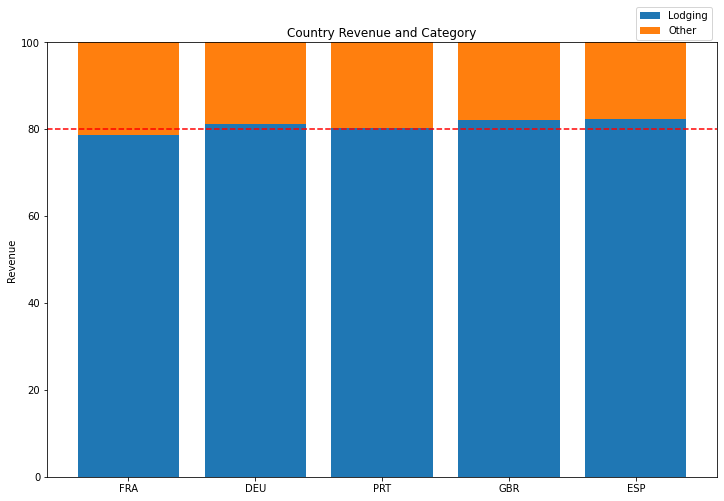

In [107]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(
    country_subset.index,
    country_subset['LodgingRevenue'] * 100 / (country_subset['LodgingRevenue'] + country_subset['OtherRevenue']),
    label='Lodging'
)

ax.bar(country_subset.index,
       country_subset['OtherRevenue'] * 100 / (country_subset['LodgingRevenue'] + country_subset['OtherRevenue']),
       bottom=country_subset['LodgingRevenue'] * 100 / (country_subset['LodgingRevenue'] + country_subset['OtherRevenue']),
       label='Other'
      )

ax.set_ylim(0, 100)
ax.axhline(80, ls='--', color='red')
ax.set_title('Country Revenue and Category')
ax.set_ylabel('Revenue')

fig.legend(bbox_to_anchor=(0.9, 0.95))
plt.show()

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [117]:
country_rev = (
    hotels
     .groupby('Nationality')
     .agg({'LodgingRevenue': 'sum'})
     .sort_values('LodgingRevenue', ascending=False)
)


country_rev

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
...,...
PNG,0.00
FJI,0.00
NRU,0.00


In [120]:
pie_data = pd.concat([
    country_rev.iloc[:5],
    pd.DataFrame({'LodgingRevenue': country_rev.iloc[5:, 0].sum()}, index=['OTH'])
]).sort_values('LodgingRevenue', ascending=False)
pie_data

,LodgingRevenue
OTH,11170126.66
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33


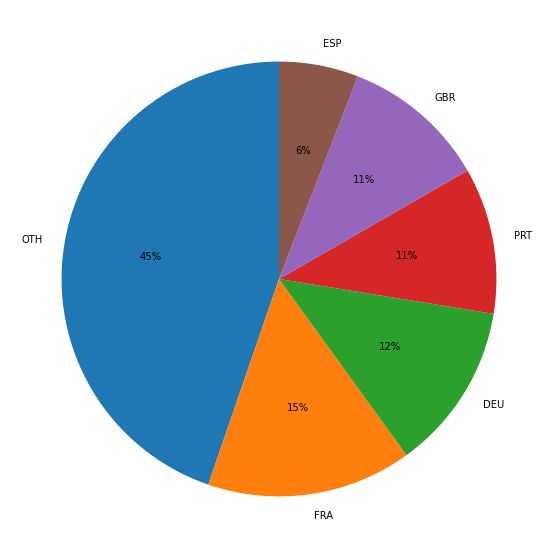

In [121]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(x=pie_data['LodgingRevenue'],
       labels=pie_data.index,
       startangle=90,
       autopct='%.0f%%'
      )


plt.show()

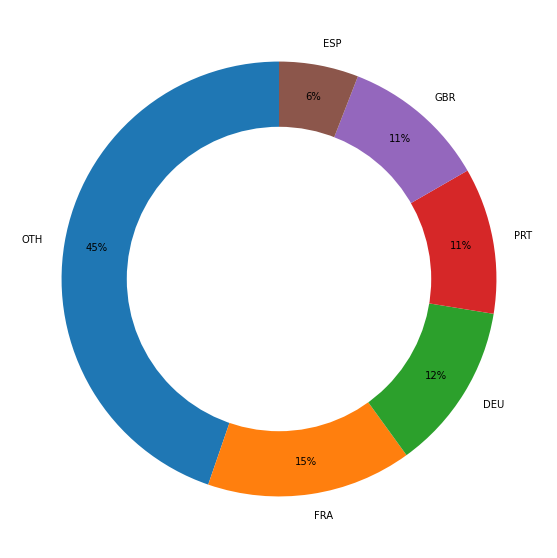

In [123]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(x=pie_data['LodgingRevenue'],
       labels=pie_data.index,
       startangle=90,
       autopct='%.0f%%',
       pctdistance=.85
      )

hole = plt.Circle((0, 0), 0.7, fc='white')
plt.gcf().gca().add_artist(hole)

plt.show()

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [124]:
hotels = hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date,total_revenue,revenue_per_night
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,2018-08-03,476.3,95.26
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,2016-01-01,333.0,66.60
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,2016-01-01,0.0,NaN
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,2016-01-01,300.0,60.00
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,2016-01-01,0.0,NaN


In [128]:
agg_hotels = hotels.groupby('Nationality').agg(
    total_revenue = ('total_revenue', 'sum'),
    avg_revenue = ('total_revenue', 'mean'),
    avg_age = ('Age', 'mean'),
    avg_nights = ('RoomNights', 'mean'),
    avg_nightly_revenue = ('revenue_per_night', 'mean')
)

agg_hotels

,total_revenue,avg_revenue,avg_age,avg_nights,avg_nightly_revenue
Nationality,,,,,
ABW,2153.22,717.740000,42.666667,3.666667,204.421111
AGO,115174.49,632.826868,41.681319,3.461538,177.745487
AIA,1290.10,430.033333,25.666667,1.666667,232.737500
ALB,4267.88,328.298462,35.153846,2.846154,118.783788
AND,3760.25,537.178571,43.285714,2.000000,283.452381
...,...,...,...,...,...
WLF,137.20,68.600000,32.000000,0.500000,137.200000
WSM,342.00,342.000000,32.000000,2.000000,171.000000
YEM,0.00,0.000000,23.000000,0.000000,NaN


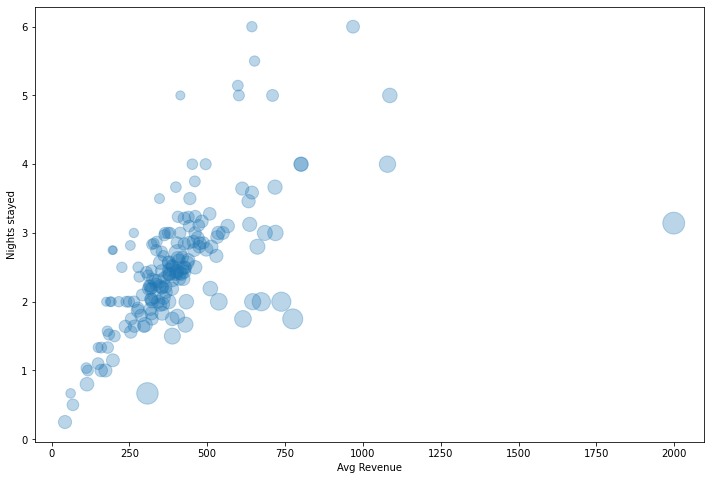

In [134]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(agg_hotels['avg_revenue'], agg_hotels['avg_nights'],
          s=agg_hotels['avg_nightly_revenue'], alpha=.3)

ax.set_xlabel('Avg Revenue')
ax.set_ylabel('Nights stayed')

plt.show()

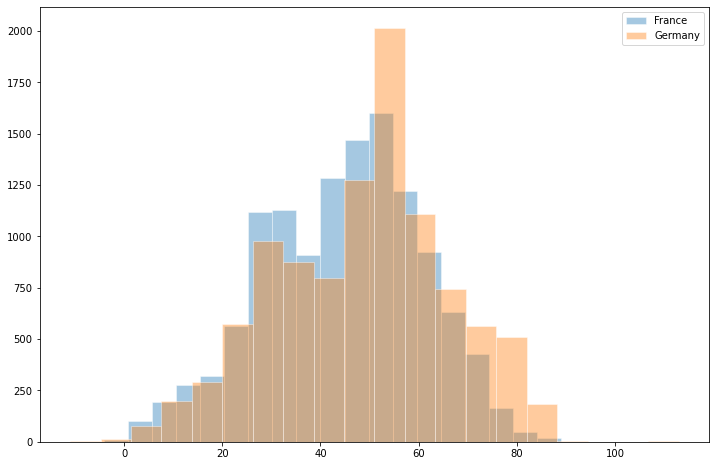

In [140]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(hotels.loc[hotels['Nationality'] == 'FRA', 'Age'],
       bins=20, edgecolor='white', alpha=.4)

ax.hist(hotels.loc[hotels['Nationality'] == 'DEU', 'Age'],
       bins=20, edgecolor='white', alpha=.4)

ax.legend(['France', 'Germany'])
plt.show()